In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [7]:
url = r'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

In [8]:
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.shape

(891, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
#for these assignment we are going to use some of the columns not all ,
#for that we are droping the column which are not necessary

df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis = 1, inplace = True)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [14]:
df.shape

(891, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [16]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

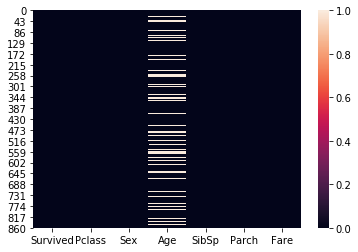

In [18]:
sns.heatmap(df.isnull())

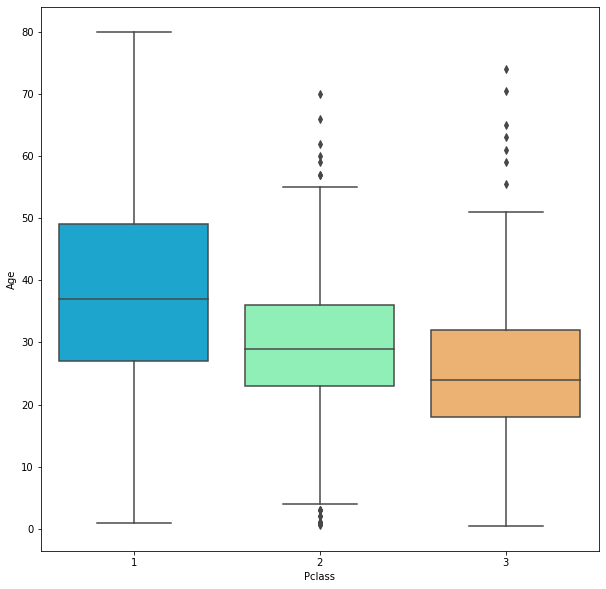

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Pclass', y = 'Age',data=df,palette='rainbow')

In [26]:
# We'll use these average age values to impute based on Pclass for Age.
# filling nana

In [31]:
def imput_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 1:
            return 27
        else:
            return 24
    else:
        return Age



In [33]:
df['Age'] = df[['Age','Pclass']].apply(imput_age,axis = 1)

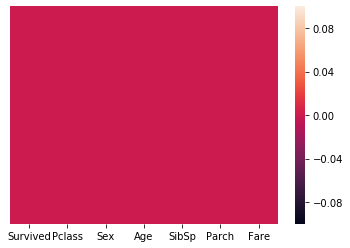

In [36]:
#lets check heapmap to see nan value
sns.heatmap(df.isnull(),yticklabels=False)

##### So there is no nan vale present in Age column 

In [37]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

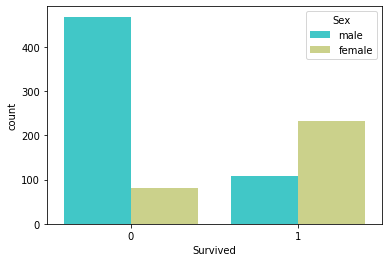

In [44]:
sns.countplot(x ='Survived', data = df,hue = 'Sex',palette='rainbow')

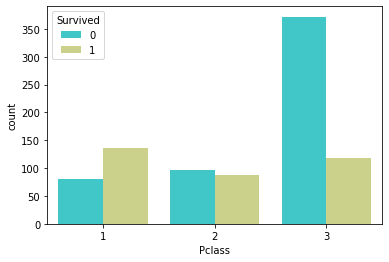

In [48]:
sns.countplot(x = 'Pclass',data = df, hue = 'Survived',palette='rainbow')

### Converting categorical  features

In [49]:
sex= pd.get_dummies(df['Sex'],drop_first = True)

In [53]:
df.drop(['Sex'],axis = 1, inplace = True)

In [56]:
df = pd.concat([df,sex],axis=1)

In [57]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [59]:
x = df.drop(['Survived'],axis = 1)

In [60]:
y = df['Survived']

In [61]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [62]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [65]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male'], dtype='object')

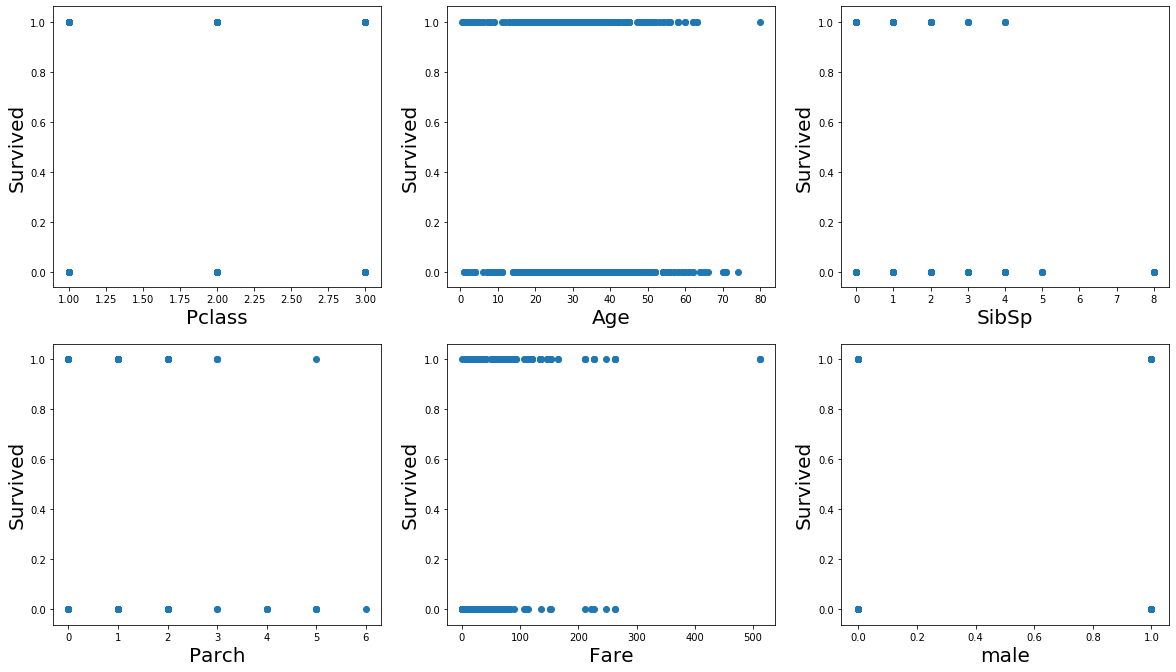

In [75]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for columns in x:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[columns],y)
        plt.xlabel(columns,fontsize=20)
        plt.ylabel('Survived',fontsize=20)
    plotnumber+=1
plt.show()

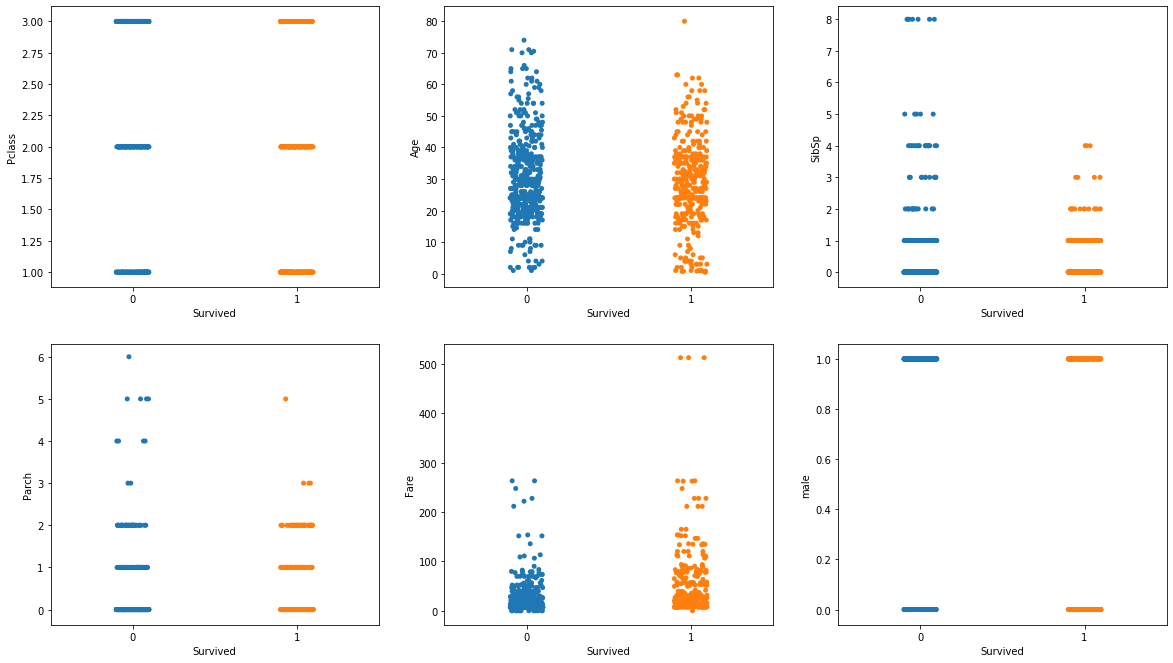

In [78]:
# let's see how data is distributes for every columns
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for columns in x:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.stripplot(y,x[columns])
        #plt.xlabel(columns,fontsize=20)
        #plt.ylabel('Survived',fontsize=20)
    plotnumber+=1
plt.show()

In [83]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [84]:
x_scaled

array([[ 0.82737724, -0.52869836,  0.43279337, -0.47367361, -0.50244517,
         0.73769513],
       [-1.56610693,  0.67894761,  0.43279337, -0.47367361,  0.78684529,
        -1.35557354],
       [ 0.82737724, -0.22678686, -0.4745452 , -0.47367361, -0.48885426,
        -1.35557354],
       ...,
       [ 0.82737724, -0.37774261,  0.43279337,  2.00893337, -0.17626324,
        -1.35557354],
       [-1.56610693, -0.22678686, -0.4745452 , -0.47367361, -0.04438104,
         0.73769513],
       [ 0.82737724,  0.22608037, -0.4745452 , -0.47367361, -0.49237783,
         0.73769513]])

In [86]:
#let's check the value of vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,vif,Features
0,1.766017,Pclass
1,1.291179,Age
2,1.279055,SibSp
3,1.312798,Parch
4,1.594710,Fare
5,1.101800,male


### All the value of vif in lee than 5 , that mean there is no multicolinearity

In [112]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size = 0.25,random_state = 42)

In [95]:
x_train.shape

(668, 6)

In [96]:
df.shape

(891, 7)

In [97]:
 x_test.shape

(223, 6)

In [102]:
from sklearn.tree import DecisionTreeClassifier
cif = DecisionTreeClassifier()
cif.fit(x_train,y_train)
cif.score(x_train,y_train)


0.9805389221556886

In [103]:
cif.score(x_test,y_test)

0.757847533632287

In [105]:
y_pred = cif.predict(x_test)

In [108]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [109]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.757847533632287

In [110]:
## Confusion Matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[110,  24],
       [ 30,  59]], dtype=int64)

In [ ]:
criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0,

### Let's Hyper tunne our model



In [114]:
grid_param = {
    'criterion' : ['gini','entropy'],
    'splitter' : ['best','random'],
    'max_depth' : range(2,13,9),
    
    'min_samples_split' : range(2,15,9),
    'max_leaf_nodes' : range(6,18,4),
    'min_samples_leaf' : range(3,15,9)
    
}

In [117]:
grid_search = GridSearchCV(estimator= cif,param_grid=grid_param,cv=9,n_jobs=-1)

In [118]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=9, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 13, 9),
                         'max_leaf_nodes': range(6, 18, 4),
                         'min_samples_leaf': range(3, 15, 9),
                         'min_samples_split': range(2, 15, 9),
                         'splitter': ['best', 'random']})

In [119]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 11, 'max_leaf_nodes': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'}


In [120]:
cif = DecisionTreeClassifier(criterion = 'gini', max_depth= 11,max_leaf_nodes=10,min_samples_leaf=3,min_samples_split=2,
                            splitter='best')

In [121]:
cif.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=10, min_samples_leaf=3)

In [122]:
cif.score(x_train,y_train)

0.8413173652694611

In [123]:
cif.score(x_test,y_test)

0.7757847533632287

In [127]:
cif.predict([[0.82737724, -0.52869836,  0.43279337, -0.47367361, -0.50244517,
         0.73769513]])

array([0], dtype=int64)

In [128]:
cif.predict([[3,22.0,1,0,7.2500,1]])

array([0], dtype=int64)

## Let's save the model

In [131]:
import pickle
with open('modelForPrediction.sav','wb') as f:
    pickle.dump(cif,f)
    
with open('StandardScaler.sav','wb') as af:
    pickle.dump(scalar,f)

ValueError: write to closed file